In [52]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,20)
matplotlib.rcParams["image.cmap"]="gray"

In [53]:
imObama = cv2.imread(DATA_PATH+"images/obama.jpg")
imObama = cv2.cvtColor(imObama,cv2.COLOR_BGR2RGB)

imTrump = cv2.imread(DATA_PATH+"images/trump.jpg")
imTrump = cv2.cvtColor(imTrump,cv2.COLOR_BGR2RGB)

src_mask = cv2.imread(DATA_PATH+"images/obama-mask.jpg",cv2.IMREAD_GRAYSCALE)

(-0.5, 499.5, 572.5, -0.5)

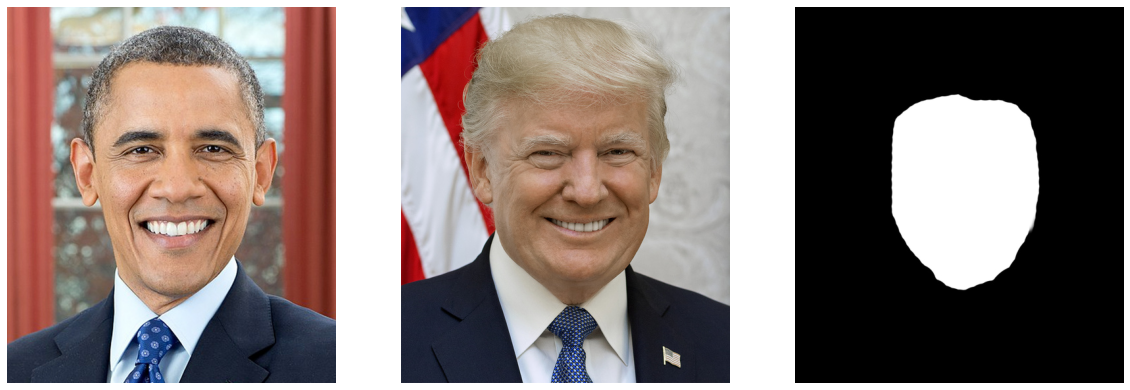

In [54]:
plt.figure(figsize=(20,20))
plt.subplot(131);plt.imshow(imObama);plt.axis("off")
plt.subplot(132);plt.imshow(imTrump);plt.axis("off")
plt.subplot(133);plt.imshow(src_mask,cmap="gray");plt.axis("off")

Alpha Blending with Mask

(-0.5, 499.5, 572.5, -0.5)

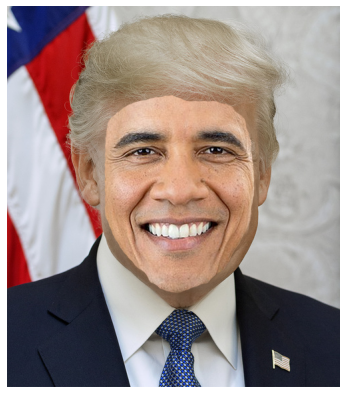

In [55]:
alpha = cv2.cvtColor(src_mask.copy(),cv2.COLOR_GRAY2RGB)
alpha = alpha.astype(np.float32) / 255.0
output_blend = imObama * alpha + imTrump * (1-alpha)
output_blend = output_blend.astype(np.uint8)
plt.figure(figsize=(7,7)); plt.imshow(output_blend); plt.axis("off")

Find blob centroid

(-0.5, 499.5, 572.5, -0.5)

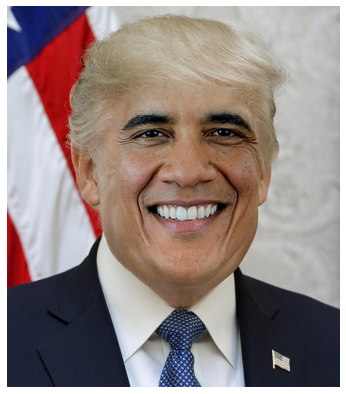

In [56]:
ret, src_mask_bin = cv2.threshold(src_mask,128,255,cv2.THRESH_BINARY)
m = cv2.moments(src_mask_bin)
center = (int(m['m01']/m['m00']), int(m['m10']/m['m00']) )

output_clone = cv2.seamlessClone(imObama,imTrump,src_mask,center,cv2.NORMAL_CLONE)
plt.figure(figsize=(7,7));plt.imshow(output_clone);plt.axis("off")